# Import libs & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as  sns

In [2]:
train_df=pd.read_csv("./test_data_scientist/train.csv")
test_df=pd.read_csv("./test_data_scientist/test.csv")
bu_feat=pd.read_csv("./test_data_scientist/bu_feat.csv")

In [3]:
train_df["day_id"]=pd.to_datetime(train_df["day_id"])
test_df["day_id"]=pd.to_datetime(test_df["day_id"])
test_df=test_df.join(test_df["day_id"].dt.isocalendar())
train_df=train_df.join(train_df["day_id"].dt.isocalendar())
train_df.loc[231272,"turnover"]=np.mean([360.013595,364.825805,381.773418])

In [ ]:
train_df

# BU feature analysis

In [38]:
bu_feat["but_region_idr_region"].unique()

array([ 69,   3,  51, 134,  71,  72,  55,   6,  75,  31,  70,  33, 107,
       178,  65, 115,  30,  53,  66,  74,   8,  52,   7,  64,   2,   4,
       121,  32, 162], dtype=int64)

In [12]:
len(bu_feat["but_region_idr_region"].unique())

29

In [381]:
bu_feat["zod_idr_zone_dgr"].unique()

array([ 4,  6, 10,  3, 72, 35,  1, 59], dtype=int64)

In [40]:
palette_region_idr = sns.color_palette(None,len(bu_feat["but_region_idr_region"].unique()))
color_palette_region_idr = dict(zip(bu_feat["but_region_idr_region"].unique(), palette_region_idr))
palette_zone_idr = sns.color_palette(None,len(bu_feat["zod_idr_zone_dgr"].unique()))
color_palette_zone_idr = dict(zip(bu_feat["zod_idr_zone_dgr"].unique(), palette_zone_idr))

Text(0.5, 0, 'lat')

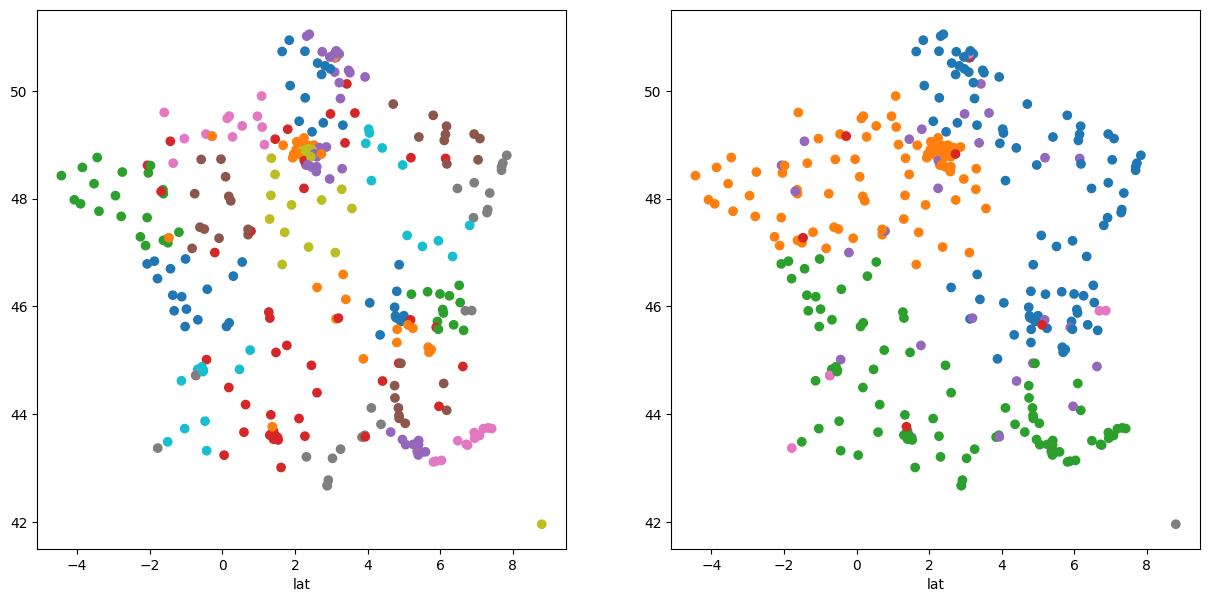

In [44]:
lat=[]
long=[]
region_idr=[]
zone_idr=[]
color_region_idr=[]
color_zone_idr=[]
for k in range(0,len(bu_feat)):
    sample = bu_feat.loc[k]
    lat.append(sample["but_latitude"])
    long.append(sample["but_longitude"])
    region_idr.append(sample["but_region_idr_region"])
    zone_idr.append(sample["zod_idr_zone_dgr"])
    color_region_idr.append(color_palette_region_idr[int(sample["but_region_idr_region"])])
    color_zone_idr.append(color_palette_zone_idr[int(sample["zod_idr_zone_dgr"])])
fig,axs=plt.subplots(1,2,figsize=(15,7))
axs[0].scatter(long,lat,color=color_region_idr)
axs[0].set_xlabel('long')
axs[0].set_xlabel('lat')
axs[1].scatter(long,lat,color=color_zone_idr)
axs[1].set_xlabel('long')
axs[1].set_xlabel('lat')


# Question 1

In [254]:
train_df[(train_df["week"]==38) & (train_df["year"]==2015)]

,day_id,but_num_business_unit,dpt_num_department,turnover,year,week,day
126164,2015-09-19,396,117,0.000000,2015,38,6
126165,2015-09-19,395,88,0.000000,2015,38,6
126166,2015-09-19,4,88,1014.488170,2015,38,6
126167,2015-09-19,58,127,1363.903486,2015,38,6
126168,2015-09-19,554,127,842.150910,2015,38,6
...,...,...,...,...,...,...,...
127244,2015-09-19,662,73,74.761358,2015,38,6
127245,2015-09-19,71,127,632.897336,2015,38,6
127246,2015-09-19,184,88,356.708193,2015,38,6
127247,2015-09-19,834,117,3.077770,2015,38,6


In [7]:
def calculate_year_turnover_all_dep(df:pd.DataFrame,year:int):
    df_year=df[(pd.to_datetime(df["day_id"])>pd.Timestamp('{}-01-01'.format(year))) 
                        & (pd.to_datetime(df["day_id"])<pd.Timestamp('{}-12-31'.format(year)))]
    department_list=np.sort(df_year["dpt_num_department"].unique())
    turnover_per_department=[]
    for department in department_list:
        turnover_per_department.append(calculate_turnover_dep(df_year,department))
    return dict(zip(department_list,turnover_per_department))

def calculate_turnover_dep(df:pd.DataFrame,department:int):
    df_dep=df[df["dpt_num_department"]==department]
    turnover=df_dep["turnover"].sum()
    return turnover

In [190]:
annual_turnover_list=[]
for year in range(2013,2018):
    annual_turnover_list.append(calculate_year_turnover_all_dep(train_df,year))
turnover_df=pd.DataFrame(annual_turnover_list,index=range(2013,2018))

In [191]:
turnover_df

,73,88,117,127
2013,7.870945e+05,5.594204e+06,6.740312e+06,1.486715e+07
2014,8.819583e+05,5.004523e+06,5.697419e+06,1.500810e+07
2015,9.741647e+05,5.207138e+06,6.092765e+06,1.654261e+07
2016,1.955585e+06,5.629350e+06,6.244515e+06,3.329544e+07
2017,7.878656e+05,4.316529e+06,4.101303e+06,1.467784e+07


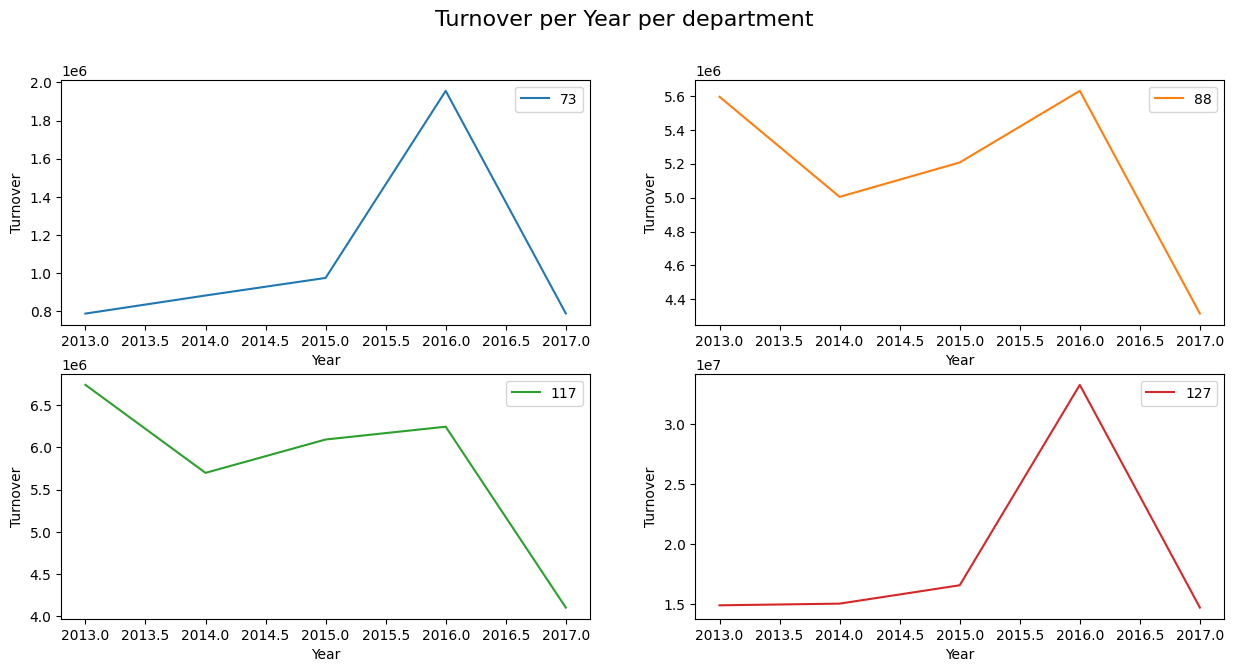

In [206]:
x=turnover_df.index
fig,axs = plt.subplots(2,2,figsize=(15,7))
fig.suptitle('Turnover per Year per department', fontsize=16)
color_plot=sns.color_palette(None,len(x))
for i,(department,ax) in enumerate(zip(turnover_df.keys(),axs.reshape(-1))):
    ax.plot(x,turnover_df[department].to_numpy(),label=department,color=color_plot[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Turnover')
    ax.legend()
plt.show()

# Question 2

In [ ]:
train_df=train_df.join(pd.to_datetime(train_df["day_id"]).dt.isocalendar())

In [8]:
def calculate_turnover_per_week_all_dep(df:pd.DataFrame,year:int):
    df_year=df[df["year"]==year]
    list_of_week=np.sort(df_year["week"].unique())
    department_list=np.sort(df_year["dpt_num_department"].unique())
    week_turnover_list=[]
    for week in list_of_week:
        turnover_per_department=[]
        for department in department_list:
            turnover_per_department.append(calculate_turnover_dep_week(df_year,department,week))
        
        week_turnover_list.append(dict(zip(department_list,turnover_per_department)))
    return pd.DataFrame(week_turnover_list,index=list_of_week)
        

def calculate_turnover_dep_week(df:pd.DataFrame,department:int,week:int):
    df_week=df[df["week"]==week]
    return calculate_turnover_dep(df=df_week,department=department)
            

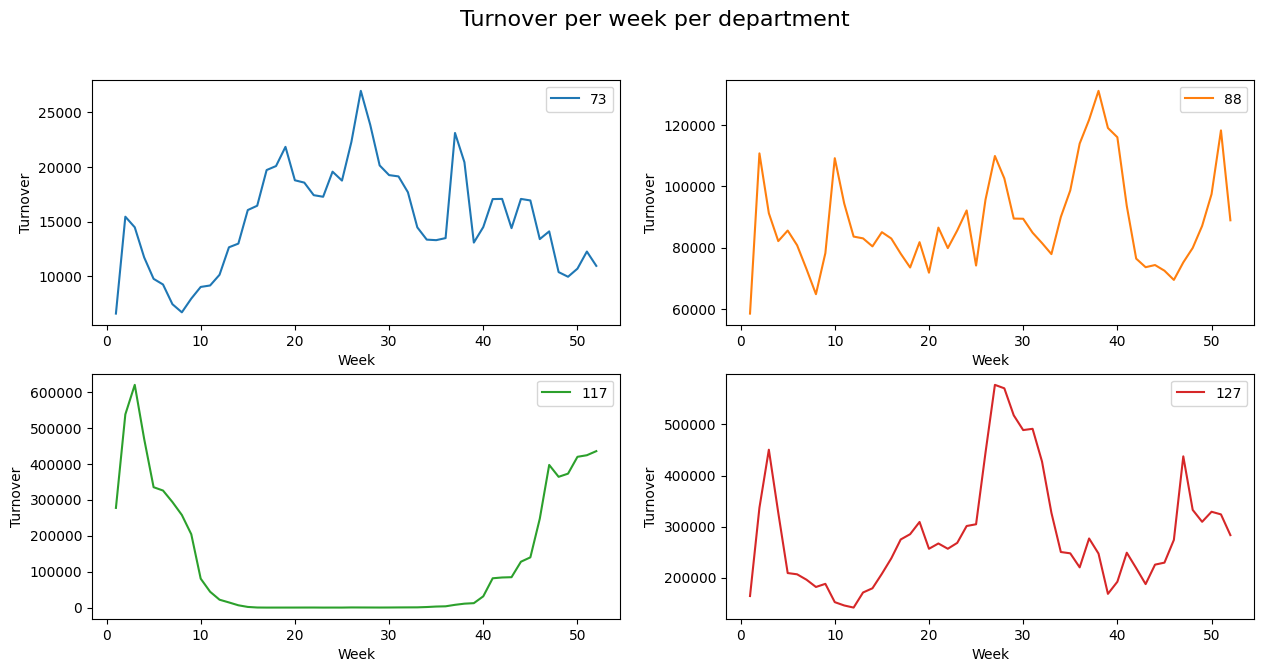

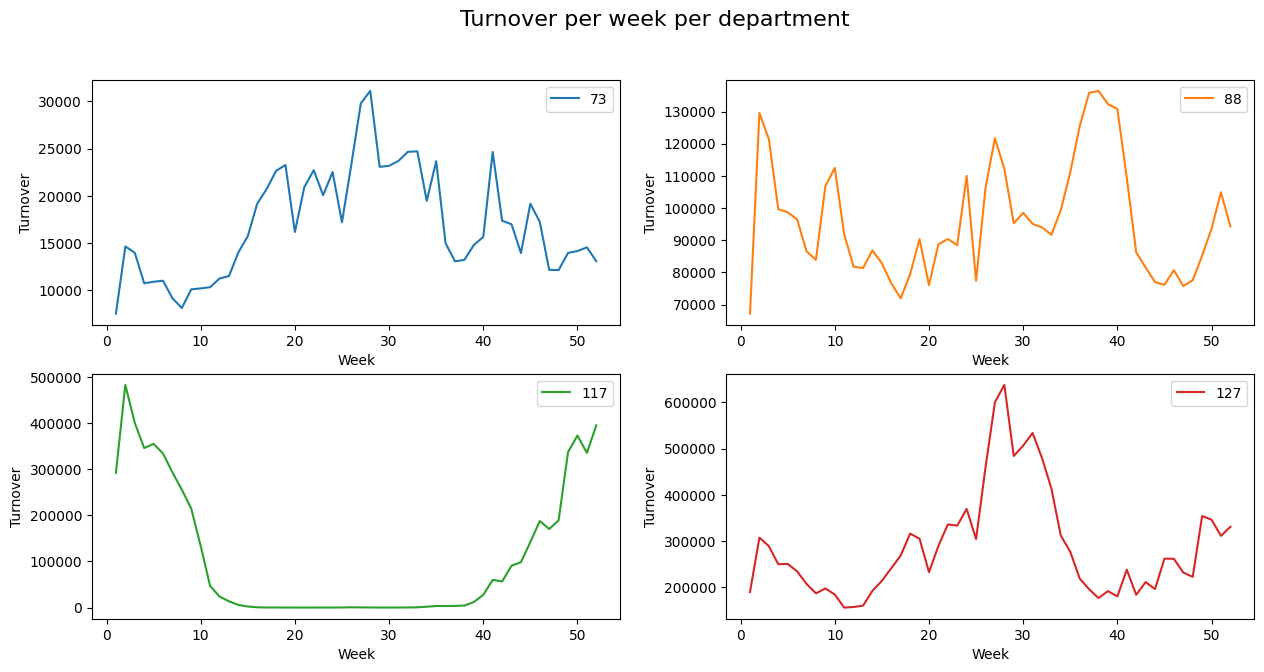

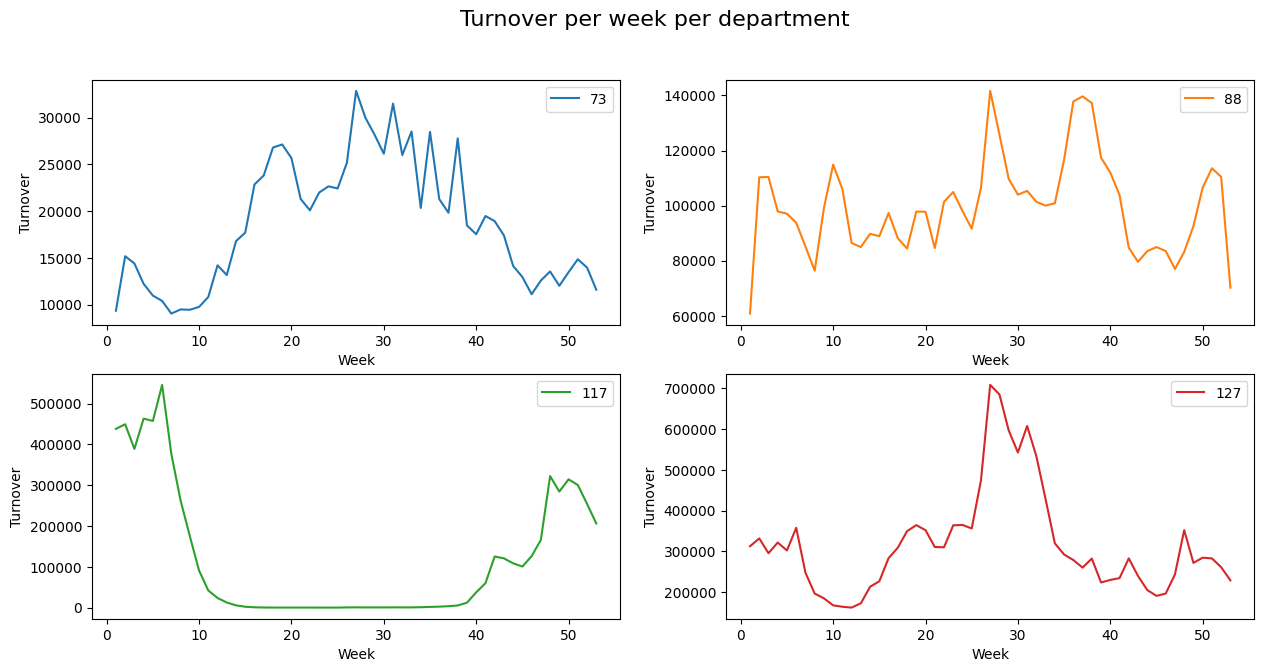

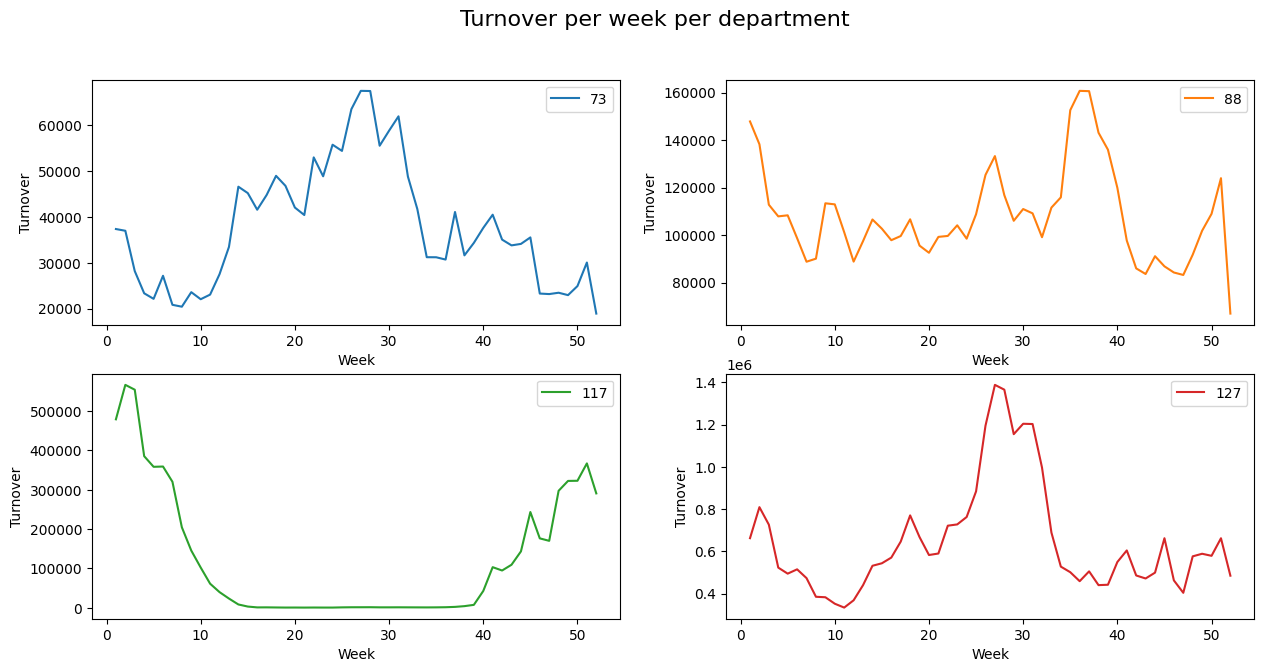

In [48]:
for year in range(2013,2017):
    # year=2014
    turnover_per_week_df=calculate_turnover_per_week_all_dep(train_df,year)
    x=turnover_per_week_df.index
    figure,axs = plt.subplots(2,2,figsize=(15,7))
    figure.suptitle('Turnover per week per department', fontsize=16)
    color_plot=sns.color_palette(None,len(x))
    for i,(department,ax) in enumerate(zip(turnover_per_week_df.keys(),axs.reshape(-1))):
        ax.plot(x,turnover_per_week_df[department].to_numpy(),label=department,color=color_plot[i])
        ax.set_xlabel('Week')
        ax.set_ylabel('Turnover')
        ax.legend()
    plt.show()

In [38]:
3000 in train_df["but_num_business_unit"].unique()

False

In [29]:
train_df[(train_df["but_num_business_unit"]==30) & (train_df["dpt_num_department"]==88) & (train_df["week"]==44)].sort_values(by=["turnover"])

,day_id,but_num_business_unit,dpt_num_department,turnover,year,week,day
59476,2016-11-05,30,88,360.013595,2016,44,6
120320,2015-10-31,30,88,364.825805,2015,44,6
176040,2014-11-01,30,88,381.773418,2014,44,6
231272,2013-11-02,30,88,1000000.000000,2013,44,6


In [47]:
train_df.loc[231272]

day_id                   2013-11-02 00:00:00
but_num_business_unit                     30
dpt_num_department                        88
turnover                          368.870939
year                                    2013
week                                      44
day                                        6
Name: 231272, dtype: object

In [46]:
train_df.loc[231272,"turnover"]=np.mean([360.013595,364.825805,381.773418])

In [28]:
bu_feat[bu_feat["but_num_business_unit"]==30]

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
303,30,38700,45.197547,5.750372,52,4


In [20]:
save[43]

1073921.4085824606

In [211]:
turnover_per_week_df=calculate_turnover_per_week_all_dep(train_df,2015)
turnover_per_week_df.sort_values(by=[88],ascending=False).head(5)

,73,88,117,127
27,32868.465958,141679.864768,765.596355,708258.754149
37,19828.774369,139674.400588,3602.315532,260511.541925
36,21290.579278,137825.642436,2509.631642,279083.680891
38,27783.256365,137232.460861,5359.341311,282653.271077
28,30004.491647,125835.541415,542.109672,684804.305833


# Question 3

In [217]:
def turnover_per_store(df:pd.DataFrame):
    num_bu_list=df["but_num_business_unit"].unique()
    turnover_list=[]
    for num_bu in num_bu_list:
        turnover_list.append(df[df["but_num_business_unit"]==num_bu]["turnover"].sum())
    return pd.DataFrame(turnover_list,index=num_bu_list,columns=['turnover'])

def turnover_per_store_per_year(df:pd.DataFrame,year=int):
    df_year=df[df["year"]==year]
    return turnover_per_store(df_year)

In [221]:
top_perf=turnover_per_store_per_year(train_df,2014).sort_values(by=['turnover'],ascending=False).head(5).index

In [227]:
top_perf

Int64Index([121, 17, 118, 189, 100], dtype='int64')

In [226]:
bu_feat[bu_feat["but_num_business_unit"].isin(top_perf)]

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
20,100,44800,47.223866,-1.627007,107,6
45,121,69500,45.725769,4.928200,8,4
59,118,59650,50.644545,3.142438,65,4
167,17,34000,43.605718,3.923199,6,10
176,189,75000,48.869257,2.325360,75,6


# Check

In [119]:
import tqdm
bu_list=train_df["but_num_business_unit"].unique()
first_day=[]
issue=[]
for bu in tqdm.tqdm(bu_list):
    dep_list=train_df[train_df["but_num_business_unit"]==bu]["dpt_num_department"].unique()
    for dep in dep_list:
        L=[]
        temp=train_df[(train_df["but_num_business_unit"]==bu) & (train_df["dpt_num_department"]==dep)]
        date_min=np.min(temp["day_id"])
        date_max=np.max(temp["day_id"])
        day=date_min
        while day<=date_max:
            L.append(day)
            day+=pd.DateOffset(weeks=1)
        if (temp["day_id"].to_numpy()[::-1]!=pd.to_datetime(np.array(L))).all():
            issue.append((bu,dep,temp["day_id"].to_numpy()[::-1],np.array(L)))
        


100%|██████████| 322/322 [00:19<00:00, 16.33it/s]


In [120]:
len(issue)

0

In [57]:

df=train_df[(train_df["but_num_business_unit"]==64) & (train_df["dpt_num_department"]==73)]
max_day_id=np.max(df["day_id"])
day_id=pd.to_datetime('2015-11-28')
# day_id=max_day_id-pd.DateOffset(weeks=24)
end_seq=day_id+pd.DateOffset(weeks=23)
sequence=df[(df["day_id"]>=day_id) & (df["day_id"]<=end_seq)].sort_values(by=["day_id"]).reset_index()

In [58]:
sequence

,index,day_id,but_num_business_unit,dpt_num_department,turnover,year,week,day
0,115575,2015-11-28,64,73,9.071237,2015,48,6
1,115188,2015-12-05,64,73,9.458620,2015,49,6
2,113928,2015-12-12,64,73,13.757963,2015,50,6
3,112108,2015-12-19,64,73,12.836063,2015,51,6
4,111000,2015-12-26,64,73,10.078623,2015,52,6
5,110484,2016-01-02,64,73,16.052070,2015,53,6
6,108760,2016-01-09,64,73,29.557075,2016,1,6
7,108296,2016-01-16,64,73,36.841076,2016,2,6
8,106844,2016-01-23,64,73,18.021715,2016,3,6
9,106016,2016-01-30,64,73,15.450816,2016,4,6


In [60]:
output_knn=np.arange(1,129)
x_old=np.linspace(0,1,num=128)
x_53=np.linspace(0,1,num=53)
x_52=np.linspace(0,1,num=52)
y_53=np.interp(x_53,x_old,output_knn)
y_52=np.interp(x_52,x_old,output_knn)
no_week_array=sequence["week"].to_numpy()
year_array=sequence["year"].to_numpy()
y_t=np.zeros(24)
for i,(w,y) in enumerate(zip(no_week_array,year_array)):
    if y==2015:
        no_week_array[i]=x_53[w-1]
        y_t[i]=y_53[w-1]
    else:
        no_week_array[i]=x_52[w-1]
        y_t[i]=y_52[w-1]

In [61]:
y_t

array([115.78846154, 118.23076923, 120.67307692, 123.11538462,
       125.55769231, 128.        ,   1.        ,   3.49019608,
         5.98039216,   8.47058824,  10.96078431,  13.45098039,
        15.94117647,  18.43137255,  20.92156863,  23.41176471,
        25.90196078,  28.39215686,  30.88235294,  33.37254902,
        35.8627451 ,  38.35294118,  40.84313725,  43.33333333])

In [40]:
no_week_array

array([0.9230769230769231, 0.9423076923076924, 0.9615384615384616,
       0.9807692307692308, 1.0, 0.0, 0.0196078431372549,
       0.0392156862745098, 0.058823529411764705, 0.0784313725490196,
       0.09803921568627451, 0.11764705882352941, 0.13725490196078433,
       0.1568627450980392, 0.1764705882352941, 0.19607843137254902,
       0.21568627450980393, 0.23529411764705882, 0.2549019607843137,
       0.27450980392156865, 0.29411764705882354, 0.3137254901960784,
       0.3333333333333333], dtype=object)

In [33]:
np.linspace(0,1,num=53)

array([0.        , 0.01923077, 0.03846154, 0.05769231, 0.07692308,
       0.09615385, 0.11538462, 0.13461538, 0.15384615, 0.17307692,
       0.19230769, 0.21153846, 0.23076923, 0.25      , 0.26923077,
       0.28846154, 0.30769231, 0.32692308, 0.34615385, 0.36538462,
       0.38461538, 0.40384615, 0.42307692, 0.44230769, 0.46153846,
       0.48076923, 0.5       , 0.51923077, 0.53846154, 0.55769231,
       0.57692308, 0.59615385, 0.61538462, 0.63461538, 0.65384615,
       0.67307692, 0.69230769, 0.71153846, 0.73076923, 0.75      ,
       0.76923077, 0.78846154, 0.80769231, 0.82692308, 0.84615385,
       0.86538462, 0.88461538, 0.90384615, 0.92307692, 0.94230769,
       0.96153846, 0.98076923, 1.        ])

In [30]:
len(np.linspace(1/128,1,num=128))

128